In [1]:
pwd

'/Users/zofia/github/DFM/interactivePython'

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import integrator
import sampler #as sampler
import model #as model
import diffusionmap as dm
import statistics_dfm as stat

import numpy as np
from simtk import openmm, unit
from openmmtools.constants import kB

import model
mdl=model.Model('Dimer')
mdlTopology=mdl.testsystem.topology
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
print (mdl.testsystem.positions)
X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)
print('Initial distance is %f' % np.linalg.norm(X0[0,:]-X0[ 1,:]))

algoVect=0

# parameters
# this is the target temperature 
T=300.0
temperature =  T * unit.kelvin#300 * unit.kelvin
kT = kB * temperature


gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

TemperatureTAMDFactor=30.0
massScale=50.0

gammaScale=100.0
kappaScale=1000.0

print("TemperatureTAMDFactor = " + repr(TemperatureTAMDFactor))
temperatureAlpha= (T*TemperatureTAMDFactor)* unit.kelvin

print('Gamma is '+repr(gamma))
print('Temperature is '+repr(temperature))
print('Temperature TAMD '+repr(TemperatureTAMDFactor)+'xTemperature')
print('Mass alpha is '+repr(massScale)+'x Mass')



# simulation class sampler takes integrator class with chosen parameters as input
integrator=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, temperatureAlpha=temperatureAlpha, dt=dt, massScale=massScale, gammaScale=gammaScale, kappaScale=kappaScale)
samplerAlgo=sampler.Sampler(model=mdl, integrator=integrator, algorithm=0, dataFileName='Data')

# nrSteps is number of steps for each nrRep , and iterate the algo nrIterations times - total simulation time is nrSteps x nrIterations
# nrSteps=args.nrSteps
# nrEquilSteps = 10 #10000
# nrIterations=args.niterations
# nrRep=args.nreplicas

algoNames=samplerAlgo.algorithmName



print(samplerAlgo.model.testsystem.topology)

Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=3.55, unit=angstrom)
angstrom
System has 2 particle(s)
[[ 0.          0.          0.        ]
 [ 1.54999995  0.          0.        ]] A
Initial distance is 1.550000
TemperatureTAMDFactor = 30.0
Gamma is Quantity(value=1.0, unit=/picosecond)
Temperature is Quantity(value=300.0, unit=kelvin)
Temperature TAMD 30.0xTemperature
Mass alpha is 50.0x Mass
721.04097803 K
<Topology; 1 chains, 1 residues, 2 atoms, 0 bonds>


In [19]:
colorList=['red', 'blue', 'black', 'green']
    
# copy values for the two states from above
min1Unit=1.55*model.unit.angstroms
min2Unit=2.55*model.unit.angstroms

dataName='TemporaryData'

In [20]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
#for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/T'+repr(simulatedTemperature)+ '/*.h5'):
for np_name in glob.glob('/Users/zofia/github/DFM/'+dataName+'/Dimer/Std/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))



Xmdtraj=list()
for i in range(len(traj)):
    #print(traj[i][0].xyz)
    Xmdtraj.append(md.Trajectory(traj[i].xyz, samplerAlgo.model.testsystem.topology))#mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
print(nrP)
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X


10
3
2


3
(100000, 2, 3)
(100000,)


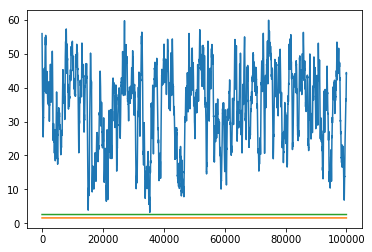

Initial radius: 56.011883803195282
Mean radius: 34.332390665120123


In [22]:

import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

print(X.shape)

#---------------- radius 
r=np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
print(r.shape)

plt.plot(range(len(r)), r)
plt.plot(range(len(r)), np.ones(len(r))*min1Unit)
plt.plot(range(len(r)), np.ones(len(r))*min2Unit)
plt.show()

print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
print("Mean radius: " +repr(np.mean(r)))


In [23]:
Xmdtraj=md.Trajectory(X, mdl.testsystem.topology)

print(Xmdtraj[-1].xyz)
Xmdtraj=Xmdtraj.superpose(Xmdtraj[0])
print(Xmdtraj[-1].xyz)

Xxyz= Xmdtraj.xyz
Xres=Xxyz.reshape(Xxyz.shape[0], Xxyz.shape[1]*Xxyz.shape[2])
print(Xres.shape)



[[[  39.84972382  105.67448425    8.63402557]
  [  80.55286407  100.9068222    -7.78857708]]]
[[[-25.37366104  21.42419052  -1.91380727]
  [ -0.62371731 -13.93222523   7.38900805]]]
(100000, 6)


In [24]:
#---------- VISUALISATION OF THE MOLECULE
#align according to first frame
traj[0]=traj[0].superpose(traj[0][0])
tpl=traj[0].topology
print(tpl)
import nglview as nv
view = nv.show_mdtraj(traj[0])

view.add_representation('spacefill', selection='all' )
view.frame = 10
view

#--- saving as gif: does not work :(
# from nglview.contrib.movie import MovieMaker
# movie = MovieMaker(view, output='my.gif')
# movie.make()


<mdtraj.Topology with 1 chains, 1 residues, 2 atoms, 0 bonds>


A Jupyter Widget

In [14]:
#X_FT=X_FT[::10]
X_FT=X
Xresh = X_FT.reshape(X_FT.shape[0], X_FT.shape[1]*X_FT.shape[2])
print('Data size')
print(Xresh.shape)



Data size
(100000, 6)


In [15]:
epsilon=1
import kernel as krnl
kernel = krnl.Kernel(epsilon=epsilon)

print('Initialize kernel')
kernel.fit(Xresh)
print('Compute kernel')
kernel_all = kernel.compute(Xresh)
print('Kernel computation done')

print('Compute KDE')
print(kernel_all.shape[0])
qEmp=kernel_all.mean(axis=1)/epsilon#kernel_all.shape[0]/(epsilon)
print(np.sum(qEmp))

Initialize kernel
Compute kernel
Kernel computation done
Compute KDE
100000
17.3633241477


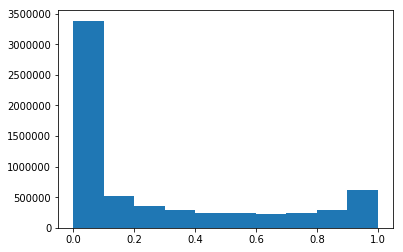

In [16]:
plt.hist(np.asarray(kernel_all[:].data), 10)
plt.show()

Get the target density at sampled data points
... might take a while ...
Done


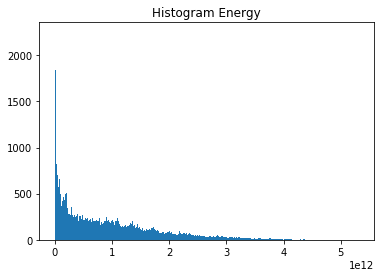

(100000,)


In [25]:
print('Get the target density at sampled data points')
print('... might take a while ...')

"""
target density: exp(-beta V(q)) : [V(q)] = kilojoule/mole, [beta] =  J/mol
"""
from simtk import unit

smpl=samplerAlgo
tr=X_FT#Xresh

qTargetDistribution=np.zeros(len(tr))
E=np.zeros(len(tr))
for i in range(0,len(tr)):
            tmp=tr[i]#.reshape(smpl.model.testsystem.positions.shape)#*smpl.model.x_unit
            #E[i]=smpl.model.energy(tmp) #/ smpl.model.energy_unit
            #print(tmp)
            Etmp= smpl.model.energy(tmp)
            #print(smpl.kT.value_in_unit(smpl.model.energy_unit))
            #print(Etmp)
            #print(Etmp)
            betatimesH_unitless =Etmp.value_in_unit(smpl.model.energy_unit) / smpl.kT.value_in_unit(smpl.model.energy_unit) #* smpl.model.temperature_unit 
            qTargetDistribution[i]=np.exp(-(betatimesH_unitless))
            #print(betatimesH_unitless)
            E[i]=Etmp.value_in_unit(smpl.model.energy_unit)
            #print(E[i])
            
print('Done')

# qTargetDistribution=np.zeros(len(tr))
# E=np.zeros(len(tr))
# Esmooth=np.zeros(len(tr))

# nrNeighbors=0

# smpl=samplerAlgo


# for i in range(0,len(tr)):
#             tmp=tr[i].reshape(smpl.model.testsystem.positions.shape)#*smpl.model.x_unit
#             #E[i]=smpl.model.energy(tmp) #/ smpl.model.energy_unit
#             #print(tmp)
#             Etmp= smpl.model.energy(tmp)
#             E[i]=Etmp.value_in_unit(unit.kilojoule_per_mole)

# for i in range(0,len(tr)):
#             tmp=tr[i].reshape(smpl.model.testsystem.positions.shape)#*smpl.model.x_unit
#             #E[i]=smpl.model.energy(tmp) #/ smpl.model.energy_unit
#             #print(tmp)
#             Etmp= E[i]
            
#             idx=np.argsort(kernel_all[i].data)[-(nrNeighbors+1):-1]
#             ee=Etmp
#             for j in range(len(idx)):
#                 ee+=E[idx[j]]
#             Etmp=ee/(len(idx)+1)
#             Esmooth[i]=Etmp
#             #print(Etmp)
#             betatimesH_unitless =Etmp / smpl.kT.value_in_unit(unit.kilojoule_per_mole) #* smpl.model.temperature_unit 
#             qTargetDistribution[i]=np.exp(-(betatimesH_unitless))
#             #print(betatimesH_unitless)
#             #E[i]=Etmp.value_in_unit(unit.kilocalorie_per_mole)
            
# print('Done')

plt.hist(E, 1000)
plt.title('Histogram Energy')
plt.show()

print(qTargetDistribution.shape)

# plt.hist(Esmooth, 1000)
# plt.title('Histogram Smoothed Energy')
# plt.show()

# print(qTargetDistribution.shape)



In [ ]:
idx=10

qEmpNormalized=qEmp/np.sum(qEmp)
qTargetDistributionNormalized=qTargetDistribution/np.sum(qTargetDistribution)

print('Value at point with index ' +repr(idx))
print('Energy '+repr(E[idx]))
print('KDE: '+repr(qEmp[idx]))
print('Target density(normalized):'+repr(qTargetDistribution[idx]))


def computeWeights(t, q):
    w=np.zeros(len(t))
    for i in range(len(t)):
        if(q[i]>10**(-10)):
            w[i] = t[i] / q[i]
        else:
            w[i] = 1.0
        
            
    return w


print('Sum qEmp is '+repr(np.sum(qEmpNormalized)))
weight=computeWeights(qTargetDistributionNormalized, qEmpNormalized)
print('Sum weights is '+repr(np.sum(weight)))
print('mean weight is '+repr(np.mean(weight)))
print('sum weight is '+repr(np.sum(weight)))
print('max weight is '+repr(np.max(weight)))
print('min weight is '+repr(np.min(weight)))
print('Max error is '+repr(np.max(np.abs(qTargetDistributionNormalized-qEmpNormalized))))
print('Mean error is '+repr(np.mean(np.abs(qTargetDistributionNormalized-qEmpNormalized))))

Value at point with index 10
Energy 1205815.625
KDE: matrix([[ 0.00034435]])
Target density(normalized):0.0
Sum qEmp is 1.0


/Users/zofia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Sum weights is nan
mean weight is nan
sum weight is nan
max weight is nan
min weight is nan


In [8]:
def plotResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    print(freeEnergyUnWeighted)
    freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergy, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()


    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
def plotAndSaveResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    #print(freeEnergyUnWeighted)
    #freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergyUnWeighted, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()#('V1_freeEn.png')

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()
    #plt.save('r_freeEn.png')

    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()
    
    
    #plt.save('V1_ePot.png')

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()
   
    plt.scatter(  r, Epot, c=V1)
    #plt.plot(  r[lm], Epot[lm], '-*r')
    plt.colorbar()
    plt.xlabel('radius')
    plt.ylabel('potential energy')
    plt.show()
   
    #plt.save('r_ePot.png')

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
    plt.scatter(  r, V1)
    #plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('radius')
    plt.ylabel('dominant eigenvector')
    plt.show()
    
    plt.scatter(  r,   Epot, c=V1)
    plt.plot(  r[lm], freeEnergyUnWeighted, '-*b')
    plt.xlabel('radius')
    plt.legend(['dominant eigenvector', 'free energy'])
    plt.show()
    #plt.save('r_V1.png')
    
    plt.scatter( range(len(r)), r, c=V1)

    plt.xlabel('simulation steps')
    plt.ylabel('radius')
    plt.show()
    
def plotCompareResults(fe1, fe2, v11 , v12,  lm1, lm2, r1, r2):
    #print(freeEnergyUnWeighted)
    
  
    plt.plot(r1[lm1], fe1, '*-b')
    plt.plot(r2[lm2], fe2, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()



In [9]:
import imp
imp.reload(sampler)
imp.reload(dm)
imp.reload(stat)

def FE(tr, eps, numberOfLandmarks, smpl, model, T, method): 
        
        tr_orig=tr
        
        tmp=md.Trajectory(tr, model.testsystem.topology)
        tmp = tmp.superpose(tmp[0])
        #------ reshape data ------------------------------

        tmp =  tmp.xyz.reshape((tmp.xyz.shape[0], tmp.xyz.shape[1]*tmp.xyz.shape[2]))
                
        tr=tmp
        v1, qTarget, qEmp, Epot, kernel=sampler.dominantEigenvectorDiffusionMap(tr, eps, smpl, T, method)
        
        #qTargetNormalized = qTarget/np.sum(qTarget)
        
        #get landmarks
        lm, levelsets, linspV = dm.get_landmarks(tr, numberOfLandmarks, qTarget, v1, Epot, getLevelSets=True)
        
        levelsets, levels = dm.get_levelsets(tr, numberOfLandmarks, qTarget, v1);
        
        tr =  tr.reshape((tr_orig.shape[0], tr_orig.shape[1],tr_orig.shape[2]))
        
        return tr, levelsets, v1, lm, qEmp, Epot, qTarget


def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                
                
        
                
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde
        else:
            return freeEnergy




In [14]:
numberOfLandmarks=50
epsilon=1

Xshort=X
print(len(Xshort))
while(len(Xshort)>2000):
    Xshort=Xshort[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshort.shape)))

# note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
print("Target temperature is "+repr(samplerAlgo.T))


# target temperature T= low temperature 100K
XspTGT,levelsetsTGT, V1TGT, lmTGT, qEmpTGT, EpotTGT, qTargetTGT =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




10000
Shape of input data: (1250, 2, 3)
Target temperature is Quantity(value=100.0, unit=kelvin)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


In [15]:

print("Target temperature is "+repr(samplerAlgo.T))
#qTargetTGT=np.exp(-EpotTGT/samplerAlgo.T)

freeEnergyWeightedTGT, weightTGT, NtildeTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='weighted')
freeEnergyRawTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='raw')


rTGT=np.linalg.norm(XspTGT[:,0,:]-XspTGT[:,1,:], 2, axis=1)



Target temperature is Quantity(value=100.0, unit=kelvin)


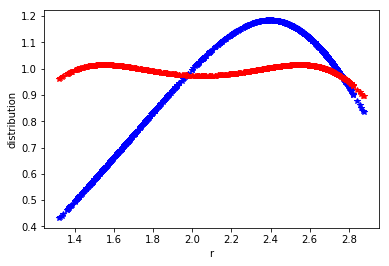

In [16]:
#qTarget=np.exp(-Epot/samplerAlgo.T)
plt.plot(rTGT, qEmpTGT/np.mean(qEmpTGT), '*b')
plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

In [17]:
#simulated temperature 
print("Simulated temperature is "+repr(simulatedTemperature))

XspST,levelsetsST, V1ST, lmST, qEmpST, EpotST, qTargetST =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, simulatedTemperature, 'TMDiffmap')#'TMDiffmap')#'Diffmap')


print("Target temperature is "+repr(simulatedTemperature))
#qTargetST=np.exp(-EpotST/simulatedTemperature)

freeEnergyWeightedST, weightST, NtildeST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='weighted')
freeEnergyRawST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='raw')


rST=np.linalg.norm(XspST[:,0,:]-XspST[:,1,:], 2, axis=1)




Simulated temperature is 300
Temperature in dominantEigenvectorDiffusionMap is 300
constructing neighbor graph
neighbor graph done
Target temperature is 300


[ 3.56493047  3.20569471  2.9698445   2.82526327  2.73345572  2.6943577
  2.72235331  2.84112264  3.01742328  3.25014647  3.50797558  3.74505664
  3.92212884  4.13744966  4.322372    4.48305438  4.67459259  4.77995311
  4.80495441  4.83059684  5.000015    5.09686482  5.18541822  5.20411035
  5.18541822  5.16706908  5.22315855  5.18541822  5.131351    5.03126754
  4.89773615  4.80495441  4.67459259  4.67459259  4.59969129  4.46487206
  4.36221791  4.27656247  4.19766852  4.14396434  4.05043829  3.92737819
  3.92212884  3.92737819  3.99261871  4.06845679  4.19079564  4.36221791
  4.66354276  4.98474752]


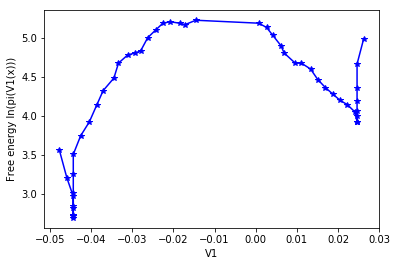

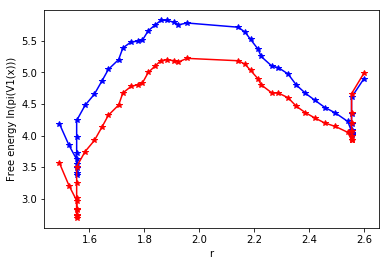

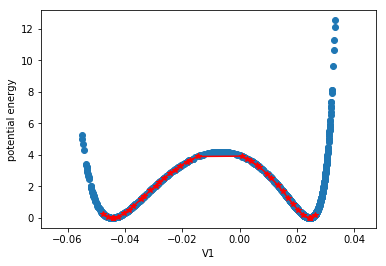

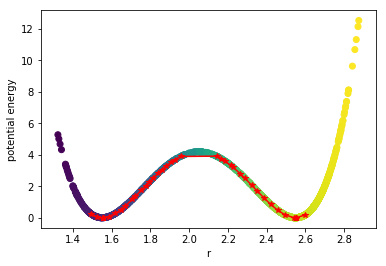

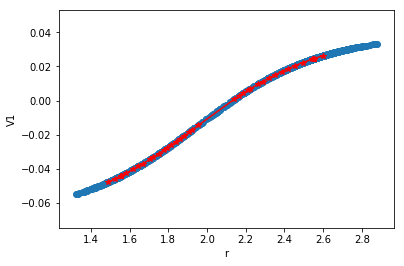

[ 5.16110574  4.73211014  4.4242835   4.2519835   4.0988611   4.02740213
  3.9879604   3.94471042  3.9879604   4.07446964  4.18251113  4.25920375
  4.31892298  4.39066689  4.52301834  4.63258054  4.69782106  4.70912062
  4.8297486   4.90979131  5.07558357  5.14340616  5.19747338  5.23521371
  5.17912425  5.19747338  5.21616552  5.19747338  5.07558357  4.99680269
  4.8297486   4.8044308   4.79200828  4.66466885  4.47692723  4.31126011
  4.10505307  3.90834277  3.72687192  3.47934717  3.21264782  2.9900133
  2.81655645  2.71102471  2.68667039  2.73283243  2.82688356  2.96388116
  3.15817891  3.48267496]


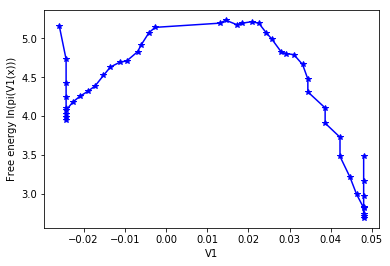

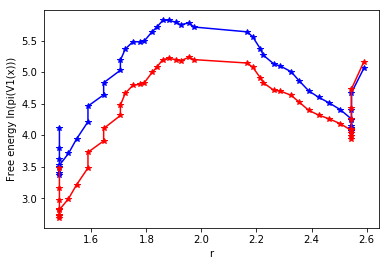

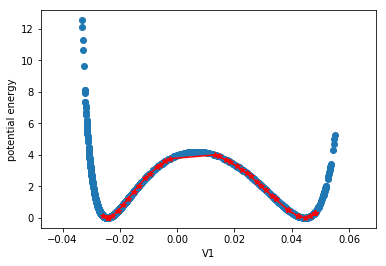

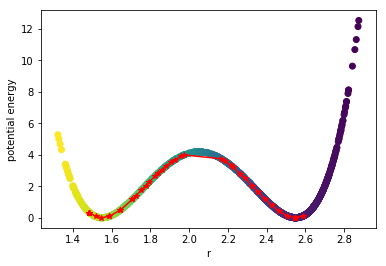

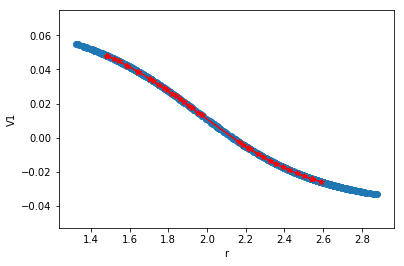

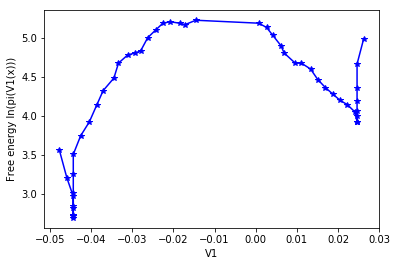

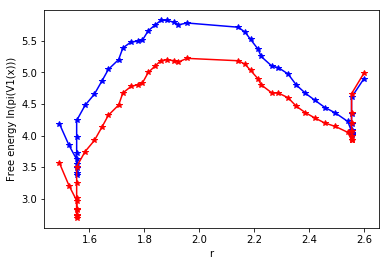

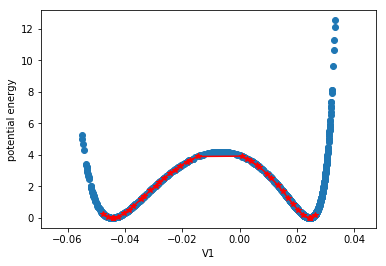

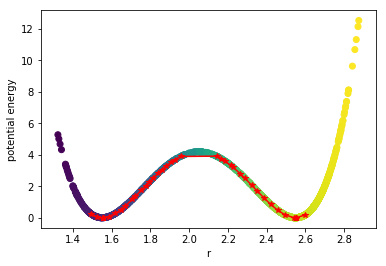

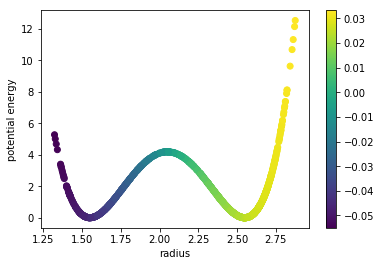

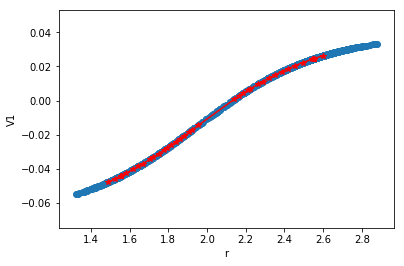

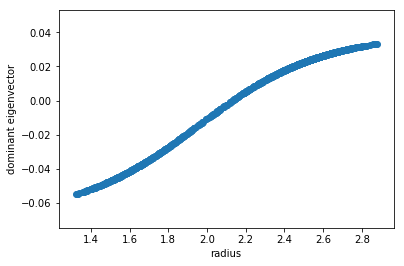

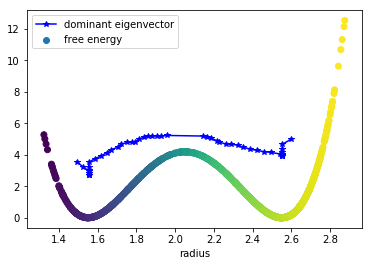

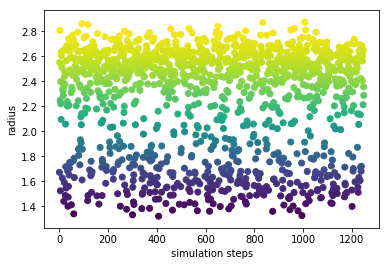

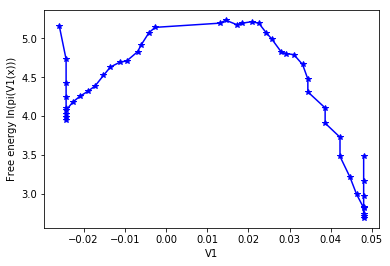

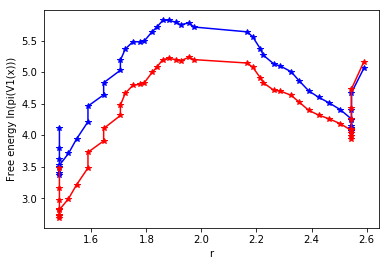

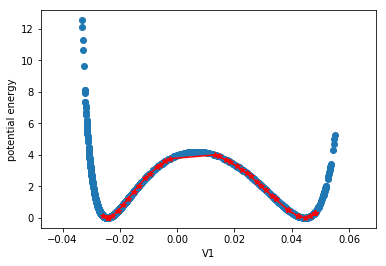

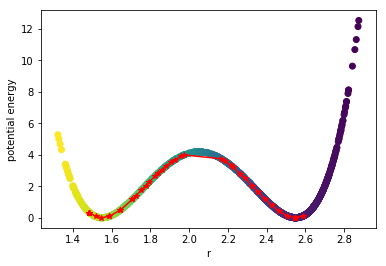

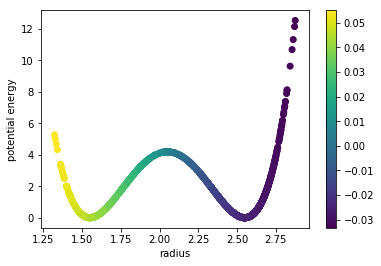

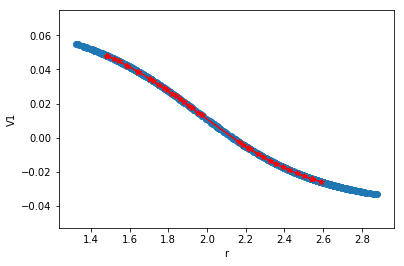

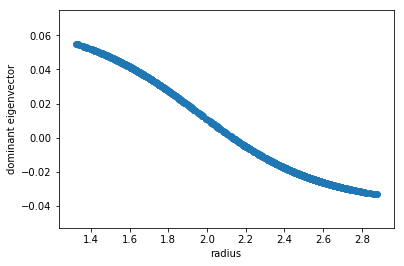

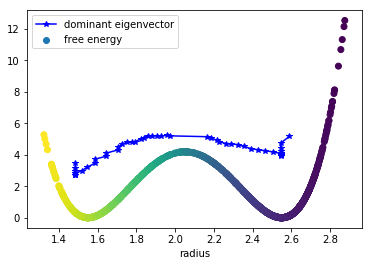

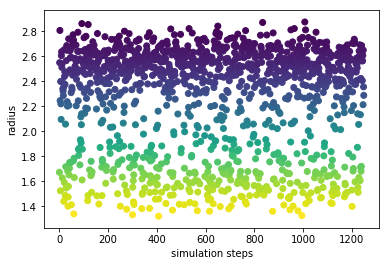

In [30]:
plotResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

plotAndSaveResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotAndSaveResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

In [19]:
# Xmd = md.Trajectory(Xshort,  mdl.testsystem.topology)

# rmsd = md.rmsd(Xmd, Xmd[0])
# print(rmsd[0])

# plt.plot(rmsd[lm], freeEnergy, '*-b')
# #plt.plot(rmsd, r, '*b')
# plt.xlabel('rmsd')
# plt.ylabel('r')
# plt.show()


# Averages

In [20]:
imp.reload(stat)
#print(samplerAlgo.model.energy)
#print(weight)

weight=weightTGT
print('mean weight is '+repr(np.mean(weight)))

#-----------average energy
meanV = stat.computeAverages(Xshort, samplerAlgo.model.energy, units=samplerAlgo.model.energy_unit)
meanVunbiased = stat.computeUnbiasedAverages(Xshort, samplerAlgo.model.energy, weight, units=samplerAlgo.model.energy_unit)

print('Raw:')
print('<V> = '+repr(meanV*samplerAlgo.model.energy_unit))

print('\nUnbiased:')
print('<V> = '+repr(meanVunbiased*samplerAlgo.model.energy_unit))


#---------- average radius
def compute_radius_2_particles(X):
    return np.linalg.norm(X[0,:]-X[1,:], 2)
    
meanR = stat.computeAverages(Xshort, compute_radius_2_particles)
meanRunbiased = stat.computeUnbiasedAverages(Xshort, compute_radius_2_particles, weight)

print('\nExpected mean radius (state1+state2)/2 = '+repr(0.5*(min1+min2)))

print('Raw:')
print('<radius> = '+repr(meanR*samplerAlgo.model.x_unit))

print('\nUnbiased:')
print('<radius> = '+repr(meanRunbiased*samplerAlgo.model.x_unit))


mean weight is 0.001331448409763571
Raw:
<V> = Quantity(value=14457071.13635, unit=kilojoule/mole)

Unbiased:
<V> = Quantity(value=12678545.033594435, unit=kilojoule/mole)

Expected mean radius (state1+state2)/2 = Quantity(value=2.05, unit=angstrom)
Raw:
<radius> = Quantity(value=2.2510944558565402, unit=angstrom)

Unbiased:
<radius> = Quantity(value=2.1464471082442276, unit=angstrom)


10
3
(10000,)


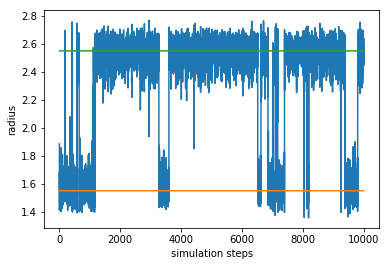

Initial radius: 1.8849581756761868
Mean radius: 2.3029574583536911


In [21]:
#---------------- load reference data - at lower temperature 
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/T100/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X



#---------------- radius 
r=np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
print(r.shape)

plt.plot(range(len(r)), r)
plt.plot(range(len(r)), np.ones(len(r))*min1)
plt.plot(range(len(r)), np.ones(len(r))*min2)
plt.xlabel('simulation steps')
plt.ylabel('radius')
plt.show()

print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
print("Mean radius: " +repr(np.mean(r)))


#compute_weight_target_distribution(target_distribution, qImoportanceSampling)

In [22]:
maximalDataLength=2000

Xshortref=Xref
while(len(Xshortref)>maximalDataLength):
    Xshortref=Xshortref[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshortref.shape)))



Xspref,levelsetsref, V1ref, lmref, qEmpref, Epotref, qTargetref =FE(Xshortref, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




Shape of input data: (1250, 2, 3)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


Target temperature is Quantity(value=100.0, unit=kelvin)


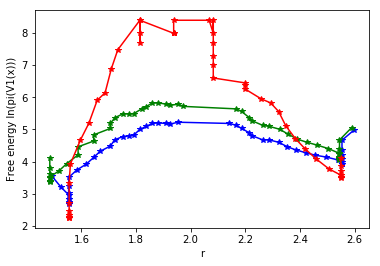

In [23]:
print("Target temperature is "+repr(samplerAlgo.T))
#qTargetref=np.exp(-Epotref/samplerAlgo.T)
#qTargetref=qTargetref/np.mean(qTargetref)
freeEnergyWeightedref, weightref, Ntilderef= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='weighted')
freeEnergyRawref= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')

r=np.linalg.norm(Xshort[:,0,:]-Xshort[:,1,:], 2, axis=1)
rref=np.linalg.norm(Xshortref[:,0,:]-Xshortref[:,1,:], 2, axis=1)

freeEnergy=freeEnergyRawTGT
freeEnergyref=freeEnergyRawref

plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.plot(rref[lmref], freeEnergyref, '*-r')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()


In [24]:
#plotResults(freeEnergyUnWeightedref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

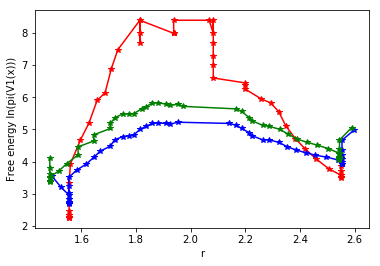

In [25]:
plt.plot(rref[lmref], freeEnergyRawref, '*-r')
plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

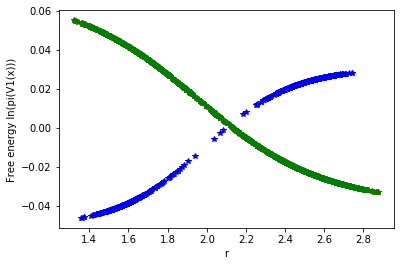

In [26]:
plt.plot(rref, V1ref, '*b')
plt.plot(rTGT, -(V1TGT), '*r')
plt.plot(rST, V1ST, '*g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

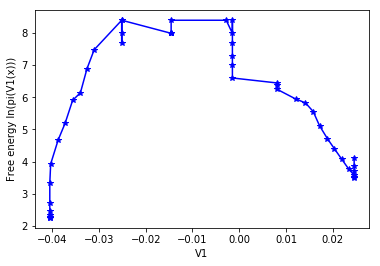

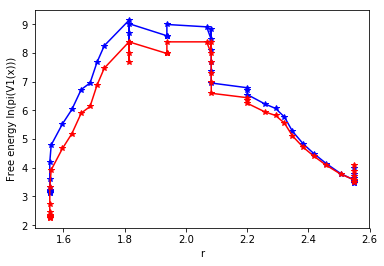

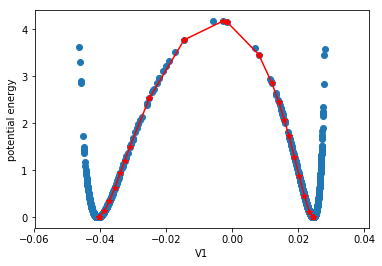

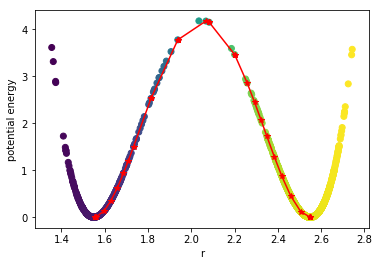

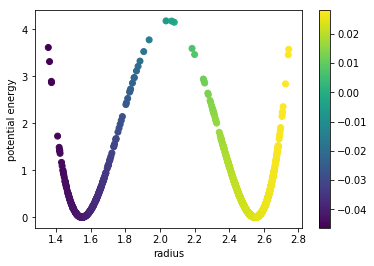

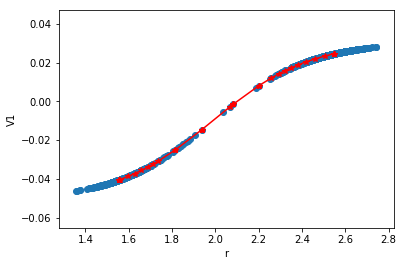

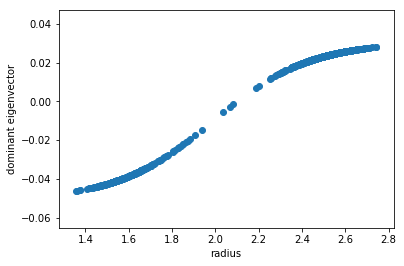

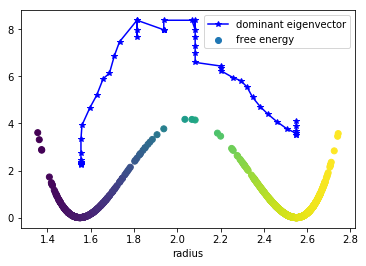

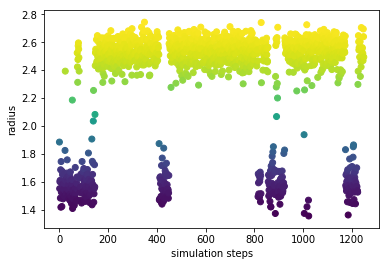

In [27]:
plotAndSaveResults(freeEnergyRawref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

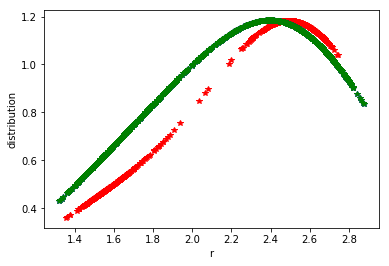

In [28]:
plt.plot(rref, qEmpref/np.mean(qEmpref), '*r')
plt.plot(rST, qEmpST/np.mean(qEmpST), '*b')
plt.plot(rTGT, qEmpTGT/np.mean(qEmpTGT), '*g')
#plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

In [ ]:

def computeFreeEnergyAtRadius(r):
      
        H, c=np.histogram(r, numberOfLandmarks, normed=True)
        print(H.shape)
        
        return -np.log(H), c
    

def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                            
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde, h
        else:
            return freeEnergy,h

freeEnergyWeightedref, weightref, Ntilderef, h= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='weighted')
freeEnergyRawref, h= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')

FH, rc=computeFreeEnergyAtRadius(rref)

print(np.sum(freeEnergyWeightedref))


print(np.sum(freeEnergyRawref))
plt.plot(rc[1:], FH, '-*')
plt.plot(rref[lmref], freeEnergyWeightedref, '-*')
plt.show()

ll=0
for i in range(10):
    ll+=np.asarray(levelsetsref[0]).shape[0]
print(ll)
print(Xref.shape)
print(np.asarray(levelsetsref[0]).shape)

10


/Users/zofia/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


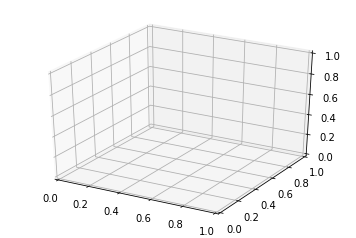

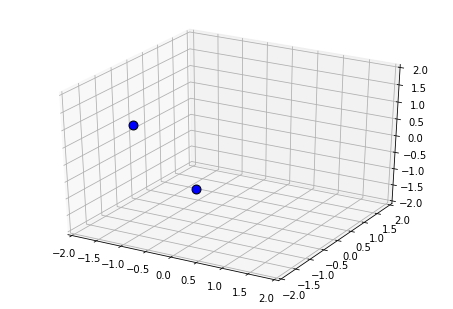

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def radiuspoint(X):
    return np.linalg.norm(X[0,:]-X[1,:], 2)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

min1=min1Unit/model.unit.angstroms
min2=min2Unit/model.unit.angstroms

# plt.show()

from matplotlib import animation
fig = plt.figure()
ax = Axes3D(fig)
ax.axis('off')

tol=0.05

def init():
    
    statecol='b'
    ax.scatter(Xxyz[0,0,0],Xxyz[0,0,1],Xxyz[0,0,2], c= statecol, alpha=1, edgecolors='none', s=80)
    ax.scatter(Xxyz[0,1,0],Xxyz[0,1,1],Xxyz[0,1,2], c= statecol, alpha=1, edgecolors='none', s=80)


    
    return fig,

def animate(i):
    ax.clear()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    #ax.axis('off')
    r=radiuspoint(Xxyz[i,:,:])
    stateIndic=0
    statecol='b'
#     if(np.abs(r-min1)/np.abs(min1)<tol):
#         statecol = 'g'
#         stateIndic=1
#     elif(np.abs(r-min2)/np.abs(min2)<tol and stateIndic==0):
#         statecol = 'r'
#     else:
#         statecol = 'b'
    ax.scatter(Xxyz[i,0,0],Xxyz[i,0,1],Xxyz[i,0,2], c= statecol, alpha=1, edgecolors='none', s=80)
    ax.scatter(Xxyz[i,1,0],Xxyz[i,1,1],Xxyz[i,1,2], c= statecol, alpha=1, edgecolors='none', s=80)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=10, blit=True)
# Save
anim.save('dimer.mp4', fps=10, dpi=80, writer='imagemagick')#extra_args=['-vcodec', 'libx264'])

